In [1]:
%load_ext autoreload
%autoreload 2

# Play the game

In [2]:
from tqdm import tqdm
import numpy as np

from environment import myEnv
from agent import QLearningAgent

map_size = 10
env = myEnv(map_size=map_size, n_problems=50)

granularity = 1
qtable_size = 2 * map_size * granularity + 1

bins = [
    np.linspace(-map_size, map_size, qtable_size),
    np.linspace(-map_size, map_size, qtable_size),
]

# Initialize Q-learning agent
agent = QLearningAgent(
    env.action_space, (qtable_size, qtable_size)
)  # Discretize state space into 20 bins per state variable

for i in range(-map_size, map_size + 1, 5):
    print((i, i), agent.discretize_state((i, i), bins))
    print()

(-10, -10) (1, 1)

(-5, -5) (6, 6)

(0, 0) (11, 11)

(5, 5) (16, 16)

(10, 10) (21, 21)



In [3]:
# Training the agent
num_episodes = 1500

best_states = [1 for _ in range(10000)]

rewards = [-10000]
for episode in tqdm(range(num_episodes)):
    observation, info = env.reset()
    current_state = agent.discretize_state(observation, bins)
    done = False
    total_reward = 0

    states = []
    while not done:
        env.render()  # Optional: Comment this line out if running on a server with no display

        action = agent.choose_action(current_state)
        next_observation, reward, done, truncated, info = env.step(action)
        next_state = agent.discretize_state(next_observation, bins)

        states.append(next_observation)

        agent.update_q_value(current_state, action, reward, next_state)

        current_state = next_state
        total_reward += reward

        if done or truncated:
            agent.epsilon = 1.0 - episode / num_episodes
            if episode % 100 == 0:
                print(
                    f"Episode {episode + 1}: Total Reward: {total_reward}; Max Reward: {max(rewards)}"
                )
                # print(agent.epsilon)
            break

    if total_reward > max(rewards):
        best_states = states[:]
        print(len(best_states))
    rewards.append(total_reward)

    # Decay epsilon after each episode
    agent.decay_epsilon()

# Close the environment
env.close()

assert len(best_states) < 100, len(best_states)
len(best_states)

  1%|          | 8/1500 [00:00<00:44, 33.16it/s]

Episode 1: Total Reward: -7700.01; Max Reward: -10000
1000
484
422


  6%|▋         | 94/1500 [00:03<00:47, 29.59it/s]

1000


  7%|▋         | 107/1500 [00:03<00:49, 28.30it/s]

Episode 101: Total Reward: -6000.01; Max Reward: -100.01


 10%|▉         | 145/1500 [00:04<00:41, 32.56it/s]

1000


 14%|█▎        | 205/1500 [00:06<00:44, 29.43it/s]

Episode 201: Total Reward: -960.0; Max Reward: -0.01


 18%|█▊        | 269/1500 [00:08<00:35, 34.69it/s]

255


 20%|██        | 307/1500 [00:10<00:33, 35.60it/s]

Episode 301: Total Reward: -0.01; Max Reward: 345.0


 26%|██▌       | 392/1500 [00:10<00:08, 132.82it/s]

134
Episode 401: Total Reward: -6044.0; Max Reward: 566.0


 33%|███▎      | 490/1500 [00:11<00:06, 147.86it/s]

223
161
158


 35%|███▌      | 531/1500 [00:11<00:05, 174.00it/s]

Episode 501: Total Reward: -1050.0; Max Reward: 842.0


 43%|████▎     | 643/1500 [00:12<00:04, 209.05it/s]

Episode 601: Total Reward: -859.0; Max Reward: 842.0


 48%|████▊     | 724/1500 [00:12<00:05, 151.73it/s]

Episode 701: Total Reward: 338.0; Max Reward: 842.0


 54%|█████▍    | 809/1500 [00:14<00:10, 63.09it/s] 

Episode 801: Total Reward: -8239.0; Max Reward: 842.0


 60%|█████▉    | 896/1500 [00:14<00:03, 154.42it/s]

128
Episode 901: Total Reward: -1621.0; Max Reward: 872.0


 68%|██████▊   | 1016/1500 [00:15<00:04, 110.95it/s]

Episode 1001: Total Reward: 577.0; Max Reward: 872.0
63


 74%|███████▍  | 1108/1500 [00:18<00:07, 52.55it/s] 

Episode 1101: Total Reward: -376.0; Max Reward: 937.0


 80%|████████  | 1207/1500 [00:19<00:04, 67.45it/s] 

Episode 1201: Total Reward: 875.0; Max Reward: 937.0


 87%|████████▋ | 1306/1500 [00:22<00:06, 28.35it/s]

Episode 1301: Total Reward: -0.01; Max Reward: 937.0


 94%|█████████▎| 1404/1500 [00:25<00:03, 30.37it/s]

Episode 1401: Total Reward: -100.01; Max Reward: 937.0


100%|██████████| 1500/1500 [00:28<00:00, 51.83it/s]


63

In [4]:
best_states

[array([4.8, 5. ]),
 array([4.8, 5. ]),
 array([4.6, 5. ]),
 array([4.6, 4.8]),
 array([4.6, 4.6]),
 array([4.8, 4.6]),
 array([4.8, 4.4]),
 array([4.8, 4.2]),
 array([4.8, 4.2]),
 array([4.8, 4. ]),
 array([4.8, 3.8]),
 array([4.6, 3.8]),
 array([4.6, 3.6]),
 array([4.8, 3.6]),
 array([4.8, 3.4]),
 array([4.8, 3.2]),
 array([4.8, 3. ]),
 array([4.8, 2.8]),
 array([4.8, 2.6]),
 array([4.8, 2.4]),
 array([4.8, 2.2]),
 array([4.8, 2. ]),
 array([4.6, 2. ]),
 array([4.4, 2. ]),
 array([4.2, 2. ]),
 array([4., 2.]),
 array([4. , 1.8]),
 array([4. , 1.6]),
 array([4. , 1.4]),
 array([4. , 1.2]),
 array([4., 1.]),
 array([3.8, 1. ]),
 array([3.6, 1. ]),
 array([3.4, 1. ]),
 array([3.2, 1. ]),
 array([3., 1.]),
 array([3. , 0.8]),
 array([3. , 0.6]),
 array([2.8, 0.6]),
 array([2.8, 0.4]),
 array([2.6, 0.4]),
 array([2.6, 0.2]),
 array([2.4, 0.2]),
 array([2.4, 0. ]),
 array([2.6, 0. ]),
 array([2.4, 0. ]),
 array([2.4, 0. ]),
 array([2.2, 0. ]),
 array([2., 0.]),
 array([1.8, 0. ]),
 array([

In [5]:
len(best_states)

63

In [6]:
set(agent.q_table.flatten())

{-164.54457485981698,
 -156.10869062379246,
 -144.9589388472674,
 -140.28634534743006,
 -110.01571293205443,
 -103.12547337228543,
 -94.55138722074183,
 -73.74196336821706,
 -46.66950402654518,
 -42.3220226182408,
 -38.93892422352789,
 -8.533021721519074,
 -8.07901448160517,
 -5.758919150147425,
 -5.084924827676616,
 -4.263992364802992,
 -2.2372322889164593,
 -0.059425408055630166,
 -2.3944714527522873e-13,
 -3.2735467150729005e-25,
 -1.0336609450244082e-25,
 0.0,
 0.3154216951754048,
 0.35912640995532114,
 0.359211493771252,
 0.35937437407359296,
 0.3800144012474609,
 0.38032447820797194,
 0.38248208962813685,
 0.389813839390563,
 0.39079809935828763,
 0.3964018869026641,
 0.39794014294241314,
 0.3981229068813244,
 0.40415822999342715,
 0.4440170926122514,
 0.6597395386187581,
 0.6792297428843366,
 0.6805525125525012,
 0.6807297357386836,
 0.7588306370291835,
 0.8757785572235994,
 0.9124256253905803,
 1.0674877918685108,
 1.1027170091796616,
 1.172257190148053,
 1.1730677861701562,
 1

# Replay game

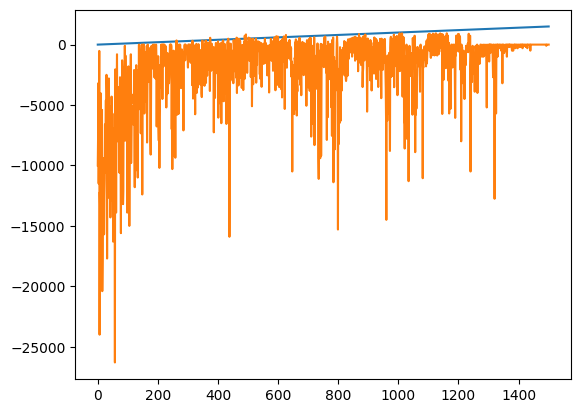

In [7]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.plot([[i, v] for i, v in enumerate(rewards)])

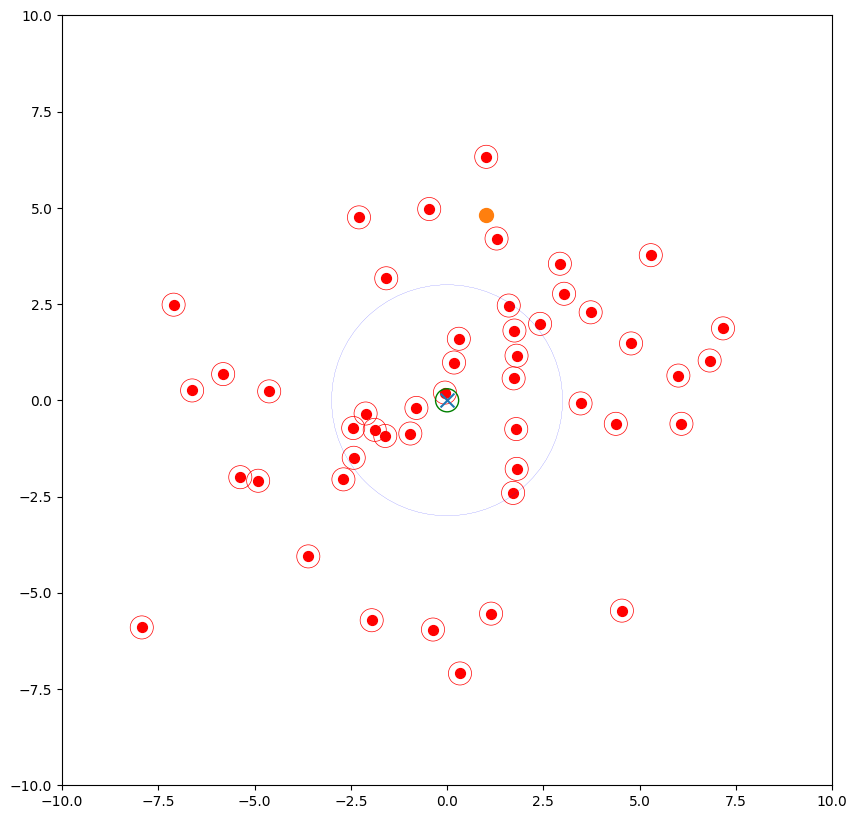

In [8]:
if True:
    state = env.state
    problems = env.problems
    target = env.target
    radius = env.radius
    eps = env.eps

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_aspect("equal")
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

    for xc, yc in problems:
        ax.scatter(xc, yc, s=50, color="red")
        ax.add_artist(
            plt.Circle(
                (xc, yc),
                radius=radius,
                edgecolor="red",
                fill=False,
                linewidth=0.5,
                label="Circle around Point",
            )
        )

    sc0 = ax.scatter(target[0], target[1], s=100, marker="x")

    # detection area
    ax.add_artist(
        plt.Circle(
            (target[0], target[1]),
            radius=radius * 10,
            edgecolor="blue",
            fill=False,
            linewidth=0.1,
        )
    )

    # target die area
    ax.add_artist(
        plt.Circle(
            (target[0], target[1]),
            radius=radius,
            edgecolor="green",
            fill=False,
            linewidth=1.0,
        )
    )
    sc1 = ax.scatter(state[0], state[1], s=100, marker="o")

In [9]:
env.__dict__

{'target': (0, 0),
 'n_problems': 50,
 'radius': 0.3,
 'step_size': 0.2,
 'problems': [(7.166597361075269, 1.8674739210795064),
  (-2.692700720070036, -2.0540175790511315),
  (-6.622681888513343, 0.2552505454121779),
  (-0.46472571761158665, 4.967557945200871),
  (5.290860159312077, 3.7688145106096567),
  (-1.580235307222384, 3.1686486386539046),
  (1.7142392884744626, -2.40622609907673),
  (-0.9548279105425425, -0.8635695618433362),
  (1.807655130621964, -1.781944176526463),
  (-5.170902861886251, 12.1792531995737),
  (1.6016258334528588, 2.4605802051139305),
  (-1.6061162357353795, -0.9266222758431161),
  (0.3342744100601381, -7.095493659495192),
  (2.929815183743598, 3.5462992595306804),
  (-7.93033623001247, -5.899959976318198),
  (-7.103264816035142, 2.4830767776805933),
  (1.795720081439292, -0.7475869383219884),
  (0.17999312178578178, 0.98053999442481),
  (-1.8799070657864119, -0.7681295187956648),
  (1.0167034226307872, 6.323641553180217),
  (2.4151064864146745, 1.985037713012

In [10]:
states = best_states[:]
len(states)

63

In [11]:
sc = ax.scatter(states[0][0], states[0][1], s=100, marker="o")

# Set the limits of the axes
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_title("Play")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# ax.plot(logs)


# Update function for the animation
def update(frame):
    x, y = states[frame]
    sc.set_offsets(np.column_stack((x, y)))
    return sc


# Create the animation
animation = FuncAnimation(fig, update, frames=len(states), blit=False, repeat=True)

# Display the animation in Jupyter Notebook
display(HTML(animation.to_jshtml()))

In [18]:
import matplotlib

writergif = matplotlib.animation.PillowWriter(fps=60)
animation.save("filename.gif", writer=writergif)